# Demonstration 1: Open Field

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import OpenField
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
img_dir = os.path.join('..','figures')
%matplotlib inline

## Value Iteration

/Users/szoro/Desktop/projects/seqanx/sisyphus/mdp/_dp.py:144: UserWarning: Reached maximum iterations.
  warn('Reached maximum iterations.')


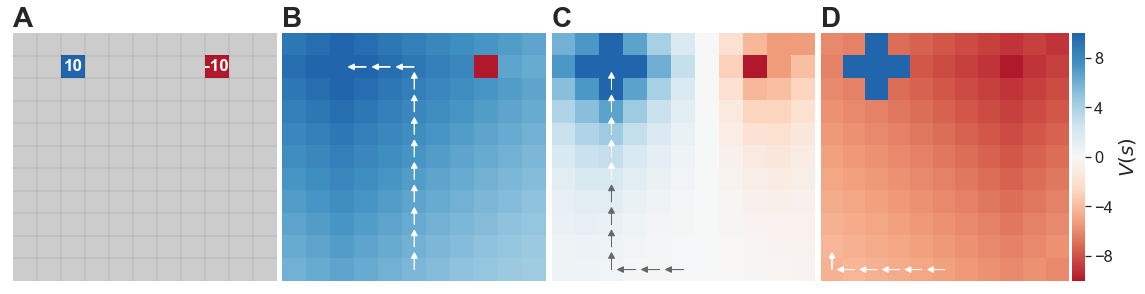

In [2]:
from sisyphus.mdp import ValueIteration
from mpl_toolkits.axes_grid1 import make_axes_locatable
from palettable.colorbrewer.diverging import RdBu_9 as palette

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
weights = [1.0, 0.5, 0.0]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Environment setup and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize figure.
fig = plt.figure(figsize=(16,4))
cmap = palette.get_mpl_colormap()
colors = palette.hex_colors

## Initialize plots and divider.
gs = gridspec.GridSpec(1,4)
gs.update(left=0.01, right=0.94, bottom=0.04, top=0.9, hspace=0, wspace=0.02)

## Initialize environment.
gym = OpenField()

## Plot environment.
ax = plt.subplot(gs[0])
ax = gym.plot_field(reward_color=colors[-1], punishment_color=colors[0], ax=ax, 
                    annot_kws=dict(fontsize=17,fontweight='semibold',color='w'))
ax.text(0,0,'A',ha='left',va='bottom',fontsize=28,fontweight='bold')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for i, (w, label) in enumerate(zip(weights, ['B','C','D'])):
    
    ## Initialize value iteration.
    qvi = ValueIteration(policy='pessimism', gamma=0.95, w=w)
    
    ## Solve for Q-values.
    qvi = qvi.fit(gym)
    V = qvi.V.reshape(gym.shape)
    V[1,[2,-3]] = [10, -10]         # Fill in terminal states.
    
    ## Solve for policy.
    pi = qvi.pi
    
    ## Initialize canvas.
    ax = plt.subplot(gs[i+1])
    if i == 2:
        cbar = True
        divider = make_axes_locatable(ax)
        cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
    else:
        cbar = False
        cbar_ax = None
    
    ## Plotting.
    sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=cbar,
                xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cbar_ax)
    ax = gym.plot_policy(ax, pi, color=np.where(np.abs(V.flatten()[pi]) < 2, '0.4', 'w'))
    ax.text(0,0,label,ha='left',va='bottom',fontsize=28,fontweight='bold')

    ## Update colorbar.
    if cbar:
        cbar = ax.collections[0].colorbar
        cbar.set_label(r'$V(s)$', fontsize=20)
    
plt.savefig(os.path.join(img_dir, '01_field.png'), dpi=1200)